In [18]:
# from myreport import html_report
from IPython.display import HTML
tog='''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''';

def init_esplot():
    plt.close('all');
    fig=plt.figure(figsize=[10, 4]);
    ax=plt.subplot(1,1,1)
    return(ax,fig)
HTML(tog)


In [2]:
%matplotlib inline
execfile('rep_util.py')

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


6.452876091
log_par = 2.0, period estimate: 6000.100000, amplitude:1042.400000, mean_LacI:308.023500
7.08596301079
log_par = 2.2, period estimate: 6000.100000, amplitude:969.100000, mean_LacI:313.579283
7.2801630497
log_par = 2.4, period estimate: 6666.777778, amplitude:1498.100000, mean_LacI:402.296550


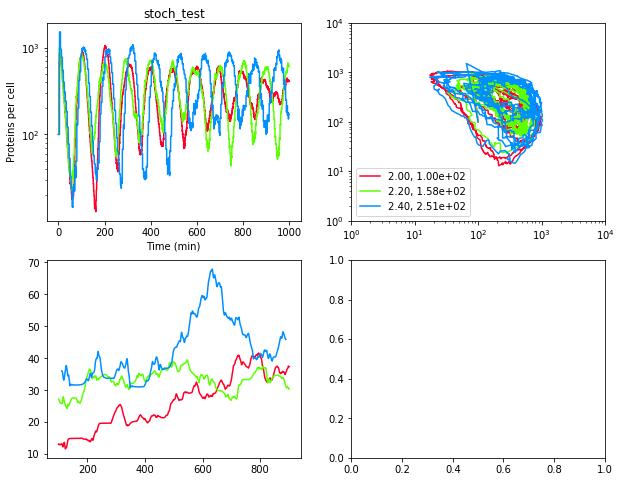

In [2]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')



t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step", it is default to 0 in default_setup and in default_param
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
exec(cmd_default_setup)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
### stochastic operator
dot_gill=precompile(sdot0_gill)

#### Construct an operator for odeint
# cmd_calcrates=precompile(sdot_det);
# cmd_calcrates=precompile(sdot_det);
def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

#### !!! empirical data !!!
#### passing a list to vary parameter on-the-fly, aliased as "log_par" in the loop
lst=np.arange(2,2.5,.2)
siz=len(lst)

for i,log_par in enumerate(lst):
    #### how many trajectory once the sample is set?
    num_traj=10; 
    s_obss=[None]*num_traj;
    tic=timer.time()
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
        step=10**log_par;

        exec(cmd_pack_all)
        t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
#         s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    period,amplitude,avg = analyse(p_LacI_obs) ### a custom function that detect the period.
    
    
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=max(int(period*nt),5);
    try:
        ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    except:print('failed to produce traj of var')
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shouldsee/.local/lib/python2.7/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:64: RuntimeWarning: Degrees of freedom <= 0 for slice


38.460411787
log_par = 1.0, period estimate: 8571.571429, amplitude:5754.000000, mean_LacI:1175.527360
33.0563578606
log_par = 1.5, period estimate: 7500.125000, amplitude:5216.000000, mean_LacI:1147.088800
45.9460160732
log_par = 2.0, period estimate: 7500.125000, amplitude:5906.000000, mean_LacI:931.260133
40.2810008526
log_par = 2.5, period estimate: 7500.125000, amplitude:6360.000000, mean_LacI:889.678400


ValueError: negative number cannot be raised to a fractional power

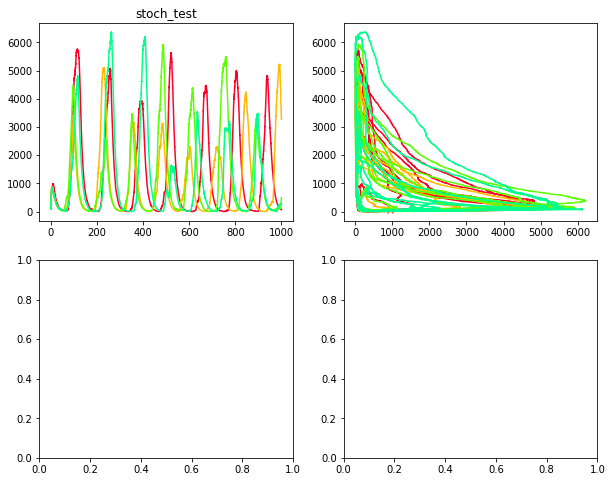

In [3]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.


exec(cmd_default_setup)### use standard setup

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);
# cmd_calcrates=precompile(sdot_det);


def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;

#### passing a list to vary parameter on-the-fly
lst=np.arange(1,4.,.5)
siz=len(lst)

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
#         step=1E-3;
        step=0;
#         cpnum=10**log_par;
#         cpnum=10;
#         k_p=0.0005;
#         K=40;

        exec(cmd_pack_all)
        t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
#         s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



In [ ]:
tl='stoch_test'

exec(cmd_init_4figures)

t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.


exec(cmd_default_setup)### use standard setup

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
# dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);
cmd_calcrates=precompile(sdot0_det);


def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;

#### passing a list to vary parameter on-the-fly
lst=np.arange(1,4.,.5)
siz=len(lst)

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
#         step=1E-3;
        step=0;
#         cpnum=10**log_par;
#         cpnum=100;
#         k_p=0.0005;
#         K=40;

        exec(cmd_pack_all)
#         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



In [ ]:
for name,val in zip(cstname,param):
    print(name,val)
for name,val in zip(varname,s0):
    print(name,val)
    

In [ ]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.


exec(cmd_default_setup)### use standard setup

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
# dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);
cmd_calcrates=precompile(sdot0_det);


def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;

#### passing a list to vary parameter on-the-fly
lst=np.arange(1,4.,.5)
siz=len(lst)

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
#         step=1E-3;
        step=0;
#         cpnum=10**log_par;
#         cpnum=100;
#         k_p=0.0005;
#         K=40;

        exec(cmd_pack_all)
#         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



In [ ]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
lc_step = int(30000*nt);
exec(cmd_default_setup)


#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);
cmd_calcrates=precompile(sdot_det);

def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;

#### passing a list to vary parameter on-the-fly
lst=np.arange(5,50,5)
siz=len(lst)

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
#         step=1E-3;
        step=0;
        cpnum=log_par;
#         cpnum=10;
#         k_p=0.0005;
#         K=40;
        exec(cmd_pack_all)
        #### finish temporary change with cmd_pack_all
#         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



In [ ]:
tl='stoch_test'

exec(cmd_init_4figures)

#### timescales
t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
exec(cmd_default_setup)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
cmd_calcrates=precompile(sdot0_det);
def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)


#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
lst=np.linspace(0,3,8)
siz=len(lst)

cmd_onthefly_param='''
#### Temporary parameter/variable change
#         step=1E-3;
step=0;
#         cpnum=10**log_par;
#         cpnum=10;
#         k_p=0.0005;
K=40;

'''

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        exec(cmd_onthefly_param)
        exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all
       
#         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    
    
    x=max(int(period*nt),5);
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


NameError: name 'sdotTST_det' is not defined

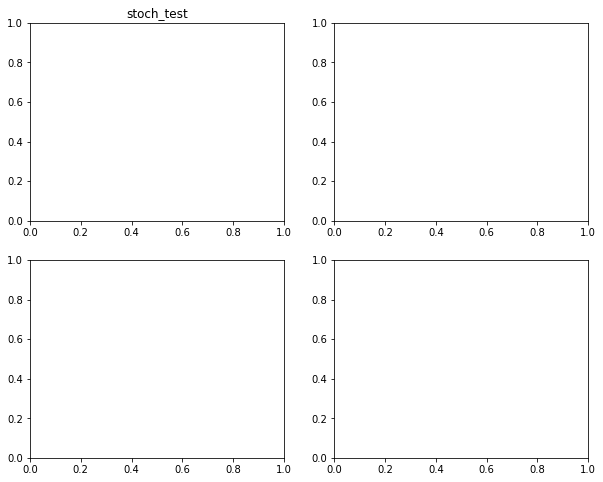

In [7]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')


step=0
t_max=1000.*60.
nt=0.1;
#### set the timescale of the simulation
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
t_init=t_obs_out[0]
t_final=t_obs_out[-1]# s_obs=gillespie_model(s0,t_obs,param)
    
# lc_step = int(10000*nt);
lc_step = len(t_obs_out);





#### initialising varname and cstname
s00=[9.0, 0.0, 2.0, 5.0, 970.0, 73.0, 65.0, 2763.0];
exec(cmd_init_name)
# varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
#varnum=len(varname);
exec(cmd_name2dict)

#### compile something before get going
cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_wrap_all=make_wrap_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)


dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);


cmd_calcrates=precompile(sdotTST_det);
def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;


exec(cmd_default_incond)
exec(cmd_default_param)
exec(cmd_pack_all)

lst=np.arange(2,2.5,.2)
siz=len(lst)
for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
    step=10**log_par;
    for j in range(num_traj):
        exec(cmd_pack_all)
#         t_obs,s_obs=gill_model(dot_gill,s0);
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,))
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs)
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()


In [ ]:
sdotTST_gill='''
k_on=k_off/K**n;
k_on_TetO=k_off/K_TetO**n;

#CIO_off = max(int(p_CI/2),CIO_off)
#LacO_off = max(int(p_LacI/2),LacO_off)
#TetO_off = max(int(p_TetR/2),TetO_off)

CI_free = p_CI - n*CIO_off;
LacI_free = p_LacI - n*LacO_off;
TetR_free = p_TetR - n*TetO_off;

#CIO_off = min(cpnum , CIO_off)
#LacO_off = min(cpnum , LacO_off)
#TetO_off = min(cpnum+cpnum_TetO , TetO_off)

rate_CIO_off_prod = k_on*(cpnum - CIO_off)*CI_free**n;
rate_CIO_off_loss = k_off*CIO_off;
rate_LacO_off_prod= k_on*(cpnum - LacO_off)*LacI_free**n
rate_LacO_off_loss= k_off*LacO_off
rate_TetO_off_prod= k_on_TetO*(cpnum+cpnum_TetO - TetO_off)*TetR_free**n;
rate_TetO_off_loss= k_off*TetO_off


rate_m_TetR_prod =  k_m0*LacO_off + k_m*(cpnum-LacO_off);
rate_m_LacI_prod = k_m0*CIO_off + k_m*(cpnum-CIO_off);
rate_m_CI_prod   = (k_m0*TetO_off + k_m*(cpnum+cpnum_TetO-TetO_off))*cpnum/(cpnum+cpnum_TetO);
rate_m_GFP_prod  = 0

rate_p_LacI_prod = k_p*(m_LacI)
rate_p_TetR_prod = k_p*(m_TetR)
rate_p_CI_prod   = k_p*(m_CI)
rate_p_GFP_prod  = 0

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP
'''
sdotTST_det = sdotTST_gill+'''
dCIO_off = rate_CIO_off_prod - rate_CIO_off_loss;
dLacO_off = rate_LacO_off_prod - rate_LacO_off_loss
dTetO_off = rate_TetO_off_prod - rate_TetO_off_loss

dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
'''

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


NameError: name 'sdotTST_det' is not defined

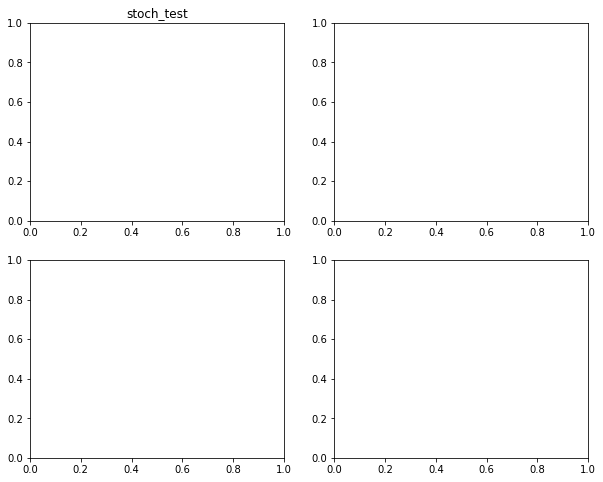

In [6]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')


step=0
t_max=1000.*60.
nt=0.1;
#### set the timescale of the simulation
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
t_init=t_obs_out[0]
t_final=t_obs_out[-1]# s_obs=gillespie_model(s0,t_obs,param)
    
# lc_step = int(10000*nt);
lc_step = len(t_obs_out);





#### initialising varname and cstname
s00=[9.0, 0.0, 2.0, 5.0, 970.0, 73.0, 65.0, 2763.0];
exec(cmd_init_name)
# varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
#varnum=len(varname);
exec(cmd_name2dict)

#### compile something before get going
cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_wrap_all=make_wrap_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)


dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);


cmd_calcrates=precompile(sdotTST_det);
def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;


exec(cmd_default_incond)
exec(cmd_default_param)
exec(cmd_pack_all)

lst=np.arange(2,2.5,.2)
siz=len(lst)
for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
    step=10**log_par;
    for j in range(num_traj):
        exec(cmd_pack_all)
#         t_obs,s_obs=gill_model(dot_gill,s0);
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,))
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs)
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/shouldsee/.local/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/shouldsee/.local/lib/python2.7/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:84: RuntimeWarning: Degrees of freedom <= 0 for slice
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:178: RuntimeWarning:

0.0720388889313
log_par = 0.0, period estimate: 0.000000, amplitude:695.173063, mean_LacI:12.756807
0.729291200638
log_par = 0.75, period estimate: 7501.250000, amplitude:973.086140, mean_LacI:218.391794
0.655988931656
log_par = 1.5, period estimate: 7501.250000, amplitude:3312.700999, mean_LacI:885.670356
0.552143096924
log_par = 2.25, period estimate: 6001.000000, amplitude:5351.331582, mean_LacI:2243.267550
0.0660579204559
log_par = 3.0, period estimate: 6667.777778, amplitude:6719.733135, mean_LacI:6044.411190


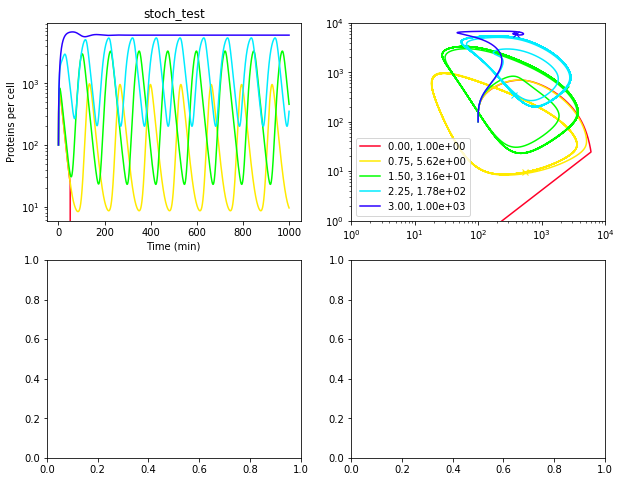

In [4]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')


step=0
t_max=1000.*60.
nt=0.1;
#### set the timescale of the simulation
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
t_init=t_obs_out[0]
t_final=t_obs_out[-1]# s_obs=gillespie_model(s0,t_obs,param)
    
# lc_step = int(10000*nt);
lc_step = len(t_obs_out);





#### initialising varname and cstname
s00=[9.0, 0.0, 2.0, 5.0, 970.0, 73.0, 65.0, 2763.0];
exec(cmd_init_name)
# varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
#varnum=len(varname);
exec(cmd_name2dict)

#### compile something before get going
cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_wrap_all=make_wrap_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)


dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);


cmd_calcrates=precompile(sdot_det);
def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;


exec(cmd_default_incond)
exec(cmd_default_param)
exec(cmd_pack_all)

lst=np.linspace(0,3,5)
siz=len(lst)
for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
    step=10**log_par;
    for j in range(num_traj):

        K=10**log_par
        
        exec(cmd_pack_all)
#         t_obs,s_obs=gill_model(dot_gill,s0);
    
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,))
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs)
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()


In [ ]:
def moving_average(a,axis=0, n=3) :
    ret = np.cumsum(a,axis=axis, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
from scipy.signal import convolve2d as conv2

(array([   3,    4,    5, ..., 5998, 5999, 6000]),)

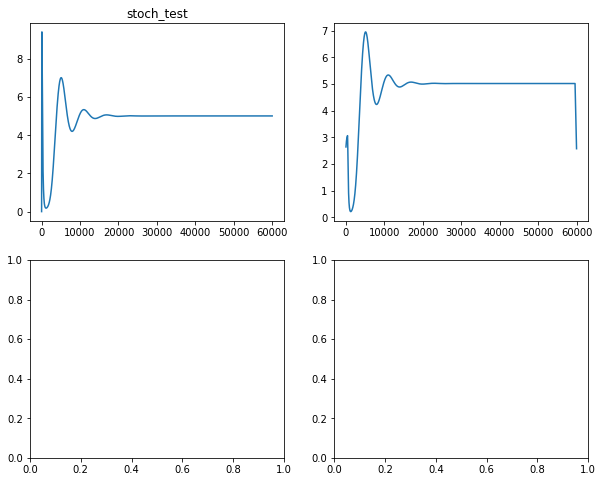

In [5]:
def peak_finder(timepoints, observations, threshold=50,hfper=300):
    maxima=[]
    minima=[]
    last_max=0
    last_min=0
    last_max_time=0
    last_min_time=0
    direction=1.0
    start_val=observations[0]
    for i in range(len(timepoints)):
        if start_val>start_val+threshold:
            direction=1.0
            break
        if start_val<start_val+threshold:
            direction=-1.0
            break
    for i in range(len(timepoints)):
        #print i, last_max, observations[i]
        if observations[i]*direction > last_max*direction :
            last_max=observations[i]
            last_max_time=timepoints[i]
        if observations[i]*direction < last_max*direction - threshold:
            if direction > 0:
                maxima.append((last_max_time,last_max))
            else:
                minima.append((last_max_time,last_max))
            last_max=observations[i]
            last_max_time=timepoints[i]
            direction*=-1.0
    return maxima
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

ts=t_obs;
ys=s_obss[0,:,5]

period=6000;
x=int(max(period*nt/10,80));
# x=40;
mys=np.convolve(ys,np.array([1./x]*x),'same')
# x=10;
# mys=np.convolve(mys,np.array([1./x]*x),'same')

# mys=np.convolve(mys,np.array([1./x]*x),'same')
# mys=np.convolve(mys,np.array([1./x]*x),'same')

pks=peak_finder(ts,mys);

axL.plot(t_obs,ys)
# axL.plot(t_obs,mys)

axR.plot(t_obs,mys)

for t,y in pks:
    axL.plot(t,y,'x')
tpks=np.where(ys>ys.mean());
tpks

In [ ]:
def gillespie_model(s0,t_obs_out,param):

    #--0--# Unpack parameters and species variables
    
#     (p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)=s
#     (k_m, k_m0, k_p, k_dm, k_dp, K, n, k_dGFP)=param
    tic1=timer.time()
    varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
    #varnum=len(varname);
    cmd_mergerates=(make_mergerates_cmd(varname,cstname));
    cmd_pack_s=make_pack_s_cmd(varname,cstname)
    cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
    print(cmd_mergerates)
    s=s0;
    exec(cmd_unpack_all)
    k_dGFP=k_dp;

    s_obs=[]
    t_obs=[]
    t_init=t_obs_out[0]
    t_final=t_obs_out[-1]
    t=t_init
    s0=(p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP);   
             
    t_obs.append(t)
    s_obs.append(s0)
    rates = np.array([0.]*len(varname*2));
    while t < t_final:

        rate_m_LacI_prod = k_m*K**n/ (K**n + p_CI**n)   + k_m0
        rate_m_TetR_prod = k_m*K**n/ (K**n + p_LacI**n) + k_m0
        rate_m_CI_prod   = k_m*K**n/ (K**n + p_TetR**n) + k_m0
        rate_m_GFP_prod  = k_m*K**n/ (K**n + p_TetR**n) + k_m0

        rate_p_LacI_prod = k_p*m_LacI
        rate_p_TetR_prod = k_p*m_TetR
        rate_p_CI_prod   = k_p*m_CI
        rate_p_GFP_prod  = k_p*m_GFP

        rate_m_LacI_loss = k_dm*m_LacI
        rate_m_TetR_loss = k_dm*m_TetR
        rate_m_CI_loss   = k_dm*m_CI
        rate_m_GFP_loss  = k_dm*m_GFP

        rate_p_LacI_loss = k_dp*p_LacI
        rate_p_TetR_loss = k_dp*p_TetR
        rate_p_CI_loss   = k_dp*p_CI
        rate_p_GFP_loss  = k_dGFP*p_GFP

        exec(cmd_mergerates)
        rate_all_events=sum(rates)
        
        if rate_all_events==0:
            break
            
        dt=random.expovariate(rate_all_events)
        event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
        event_type=types[event.nonzero()[0][0]]
        event_ind=event.nonzero()[0][0];
        cmd_event=cmd_events[event_ind];

        exec(cmd_event)
        t=t+dt


        exec(cmd_pack_s)
#         species=(p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI, m_GFP, p_GFP)       
        t_obs.append(t)
        s_obs.append(s)
    
    s_obs_out=resample_observations(t_obs,s_obs,t_obs_out)
    return np.array(s_obs_out)

In [ ]:
varname

In [ ]:
# s=(p_LacI, p_TetR, p_CI, m_LacI, m_TetR, m_CI)

k_m=0.5
k_m0=5e-4
t_half_p=8.*60
t_half_m=2.*60
av_p_per_mRNA=20.0
K=40.0
n=2.1

k_dm=math.log(2.0)/t_half_m
k_dp=math.log(2.0)/t_half_p
k_dGFP=0.000128
t_av_p=1./k_dp
t_av_m=1./k_dm
k_p=av_p_per_mRNA/t_av_m


In [ ]:
ys_itp.shape

In [ ]:
precompile = lambda code:compile(code,  "<string>", "exec");
precompile(make_pack_s_cmd(varname,cstname))

In [ ]:
varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
make_mergerates_cmd = lambda varname,cstname: 'rates=np.array([%s]);'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))
cmd_mergerates=make_mergerates_cmd(varname,cstname)
#varnum=len(varname);
cmd_events=list('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind) for event_ind in range(2*len(varname)))
# cmd_events[0
cmd_events=list(['{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind) for event_ind in range(2*len(varname))])


In [ ]:
#### for debugging


step=1;
# step=0;
t_max=1000.*60.
t_obs_out=np.linspace(0,t_max,t_max/10+1) # store obs every 10 seconds

tic=timer.time()
varname=['m_LacI','m_TetR','m_CI','m_GFP','p_LacI','p_TetR','p_CI','p_GFP'];
#varnum=len(varname);
exec(cmd_name2dict)


cmd_calcrates=precompile(sdot0)



cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
# cmd_events=list([('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)

exec(cmd_default_incond)
exec(cmd_default_param)
k_m=0.5
k_m0=5e-4

exec(cmd_pack_all)
# step=log_par
exec(cmd_pack_s)

t_init=t_obs_out[0]
t_final=t_obs_out[-1]# s_obs=gillespie_model(s0,t_obs,param)
k_dGFP=k_dp;
s_obs=[list(s)]
t_obs=[t_init]
t=t_init
rates = np.array([0.]*len(varname*2))

tic=timer.time();
while t < t_final:
    exec(cmd_unpack_all)
    exec(cmd_calcrates)
    exec(cmd_mergerates)
    rate_all_events=sum(rates)
    if rate_all_events==0:
        break
#     exec(cmd_next_event)
    
#     rates[math.isnan(rates)]=0;
    
    if not step:
        dt=random.expovariate(rate_all_events)
        event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
        event_ind=event.nonzero()[0][0];
        cmd_event=cmd_events[event_ind];
        exec(cmd_event)
        exec(cmd_pack_s)
        s_obs.append(s)
    else:
        dt=0;
        count=0;
        while dt<step:
            dt+=random.expovariate(rate_all_events);
            count+=1;
        event=np.random.multinomial(count,[rate/rate_all_events for rate in rates]);
        s=(s+np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)).clip(0.);
        s_obs.append(s)
    t=t+dt
    t_obs.append(t)

    
    
s_obs=np.array(resample_observations(t_obs,s_obs,t_obs_out))
t_obs=t_obs_out;

toc=timer.time()
print(toc-tic)
visualise()


In [ ]:
np.random.seed(0)
random.seed(0)


cmd_next_event=precompile('''
if step<=1:
    dt=random.expovariate(rate_all_events)
    event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
    event_ind=event.nonzero()[0][0];
    cmd_event=cmd_events[event_ind];
    exec(cmd_event)
    np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    exec(cmd_pack_s)
    s_obs.append(s)
else:
    dt=sum(random.expovariate(rate_all_events) for x in range(step) )
    event=np.random.multinomial(step,[rate/rate_all_events for rate in rates]);
    s+=np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    s_obs.append(s.tolist())
t=t+dt
t_obs.append(t)''')

cmd_next_event=precompile('''
if not step:
    dt=random.expovariate(rate_all_events)
    event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
    event_ind=event.nonzero()[0][0];
    cmd_event=cmd_events[event_ind];
    exec(cmd_event)
    np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    exec(cmd_pack_s)
    s_obs.append(s)
else:
    dt=0;
    count=0;
    while dt<step:
        dt+=random.expovariate(rate_all_events);
        count+=1;
    event=np.random.multinomial(count,[rate/rate_all_events for rate in rates]);
    s=(s+np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)).clip(0.);
    s_obs.append(s)
t=t+dt
t_obs.append(t)''')


exec(cmd_init_name)
exec(cmd_name2dict)
exec(cmd_name2dict)


sdot0_gill='''
rate_m_LacI_prod = k_m*K**n/ (K**n + p_CI**n)   + k_m0
rate_m_TetR_prod = k_m*K**n/ (K**n + p_LacI**n) + k_m0
rate_m_CI_prod   = k_m*K**n/ (K**n + p_TetR**n) + k_m0
rate_m_GFP_prod  = k_m*K**n/ (K**n + p_TetR**n) + k_m0

rate_p_LacI_prod = k_p*m_LacI
rate_p_TetR_prod = k_p*m_TetR
rate_p_CI_prod   = k_p*m_CI
rate_p_GFP_prod  = k_p*m_GFP

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP
'''

sdot_gill='''
k_on=k_off/K**n;
k_on_TetO=k_off/K_TetO**n;

CIO_off = max(int(p_CI/2),CIO_off)
LacO_off = max(int(p_LacI/2),LacO_off)
TetO_off = max(int(p_TetR/2),TetO_off)

CI_free = p_CI - n*CIO_off;
LacI_free = p_LacI - n*LacO_off;
TetR_free = p_TetR - n*TetO_off;

CIO_off = min(cpnum , CIO_off)
LacO_off = min(cpnum , LacO_off)
TetO_off = min(cpnum+cpnum_TetO , TetO_off)

rate_CIO_off_prod = k_on*(cpnum - CIO_off)*CI_free**n;
rate_CIO_off_loss = k_off*CIO_off;
rate_LacO_off_prod= k_on*(cpnum - LacO_off)*LacI_free**n
rate_LacO_off_loss= k_off*LacO_off
rate_TetO_off_prod= k_on_TetO*(cpnum+cpnum_TetO - TetO_off)*TetR_free**n;
rate_TetO_off_loss= k_off*TetO_off


rate_m_TetR_prod =  k_m0*LacO_off + k_m*(cpnum-LacO_off);
rate_m_LacI_prod = k_m0*CIO_off + k_m*(cpnum-CIO_off);
rate_m_CI_prod   = (k_m0*TetO_off + k_m*(cpnum+cpnum_TetO-TetO_off))*cpnum/(cpnum+cpnum_TetO);
rate_m_GFP_prod  = 0

rate_p_LacI_prod = k_p*(m_LacI)
rate_p_TetR_prod = k_p*(m_TetR)
rate_p_CI_prod   = k_p*(m_CI)
rate_p_GFP_prod  = 0

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP
'''
sdot_det = sdot_gill+'''
dCIO_off = rate_CIO_off_prod - rate_CIO_off_loss;
dLacO_off = rate_LacO_off_prod - rate_LacO_off_loss
dTetO_off = rate_TetO_off_prod - rate_TetO_off_loss

dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
'''
cmd_calcrates=precompile(sdot0_gill)

def gill_model(cmd_calcrates,s0):

#     s=s00[:];
    k_m=0.5
    k_m0=5e-4
#     step=10**log_par
    
    t_init=t_obs_out[0]
    t_final=t_obs_out[-1]
#     exec(cmd_pack_s)
    k_dGFP=k_dp;   
    s_obs=[list(s0)]
    t_obs=[t_init]
    t=t_init
    s=s0;
    exec(cmd_unpack_all)
    
    rates = np.array([0.]*len(varname*2))
    while t < t_final:
        exec(cmd_unpack_all)
        exec(cmd_calcrates)
        exec(cmd_mergerates)
        rate_all_events=sum(rates)
        if rate_all_events==0:
            break
        exec(cmd_next_event)
    s_obs=np.array(resample_observations(t_obs,s_obs,t_obs_out))
    t_obs=t_obs_out;
    return((t_obs_out,s_obs))



def visualise():
    tl='temp_visual'
    global nt,siz,i,log_par
    nt=0.1
    siz=10;
    i=0;
    log_par=1;
    
    exec(cmd_unpack_allobs)
    fig1 = plt.figure(figsize=(10,8))
    axL=fig1.add_subplot(2,2,1)
    axR=fig1.add_subplot(2,2,2)
    ax3=fig1.add_subplot(2,2,3)
    ax4=fig1.add_subplot(2,2,4)
    axL.set_title(tl);
    cm = plt.get_cmap('gist_rainbow')
    
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs)
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
    # axL.set_xlim(1E-1,1000)
    # axL.set_ylim(1E-1,6000)
    axL.set_yscale('log')
    axL.set_xlabel('Time (min)')
    axL.set_ylabel('Proteins per cell')
    # axL.legend()
    axR.set_xscale('log')
    axR.set_yscale('log')
    axR.set_xlim(1,1E4)
    axR.set_ylim(1,1E4)
    axR.legend()

In [ ]:
#### for debugging

cmd_calcrates=precompile(sdot_gill)
step=1E-1;
step=0;

t_max=500.*60.
t_obs_out=np.linspace(0,t_max,t_max/10+1) # store obs every 10 seconds
exec(cmd_init_name)
exec(cmd_name2dict)
cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
# cmd_events=list([('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)

exec(cmd_default_incond)
exec(cmd_default_param)

exec(cmd_pack_all)
# step=log_par
exec(cmd_pack_s)

t_init=t_obs_out[0]
t_final=t_obs_out[-1]# s_obs=gillespie_model(s0,t_obs,param)
k_dGFP=k_dp;
s_obs=[list(s)]
t_obs=[t_init]
t=t_init
rates = np.array([0.]*len(varname*2))

tic=timer.time();
# cpnum=300;

while t < t_final:
    exec(cmd_unpack_all)
    exec(cmd_calcrates)
    exec(cmd_mergerates)
    raw_rates=rates[:];
    rates=[max(x,y) for x,y in zip(rates,[0]*len(rates))]
    rate_all_events=sum(rates)
    if rate_all_events==0:
        break
#     exec(cmd_next_event)
    
#     rates[math.isnan(rates)]=0;
    
    if not step:
        dt=random.expovariate(rate_all_events)
        event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
        event_ind=event.nonzero()[0][0];
        cmd_event=cmd_events[event_ind];
        exec(cmd_event)
        exec(cmd_pack_s)
        s_obs.append(s)
    else:
        dt=0;
        count=0;
        while dt<step:
            dt+=random.expovariate(rate_all_events);
            count+=1;
        event=np.random.multinomial(count,[rate/rate_all_events for rate in rates]);
        sraw=(s+np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1));
        s=sraw.clip(0.);
        s_obs.append(s)
    t=t+dt
    t_obs.append(t)

    
    
s_obs=np.array(resample_observations(t_obs,s_obs,t_obs_out))
t_obs=t_obs_out;

toc=timer.time()
print(toc-tic)
visualise()


In [11]:
### a copy of rep_util.py
import time as timer
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math,copy,random
import sys
import multiprocessing
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve2d
import pickle
# from scipy.signal import savgol_filter


try: os.mkdir('resources') 
except: pass

# %matplotlib inline

# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# import random
# import sys
# import math

flatten = lambda l: [item for sublist in l for item in sublist]

global IPTG

cmd_init_name='''
varname=['p_LacI','p_TetR','p_CI','m_LacI','m_TetR','m_CI','m_GFP','p_GFP','CIO_off','LacO_off','TetO_off'];
cstname=['k_m','k_m0','k_p','k_dm','k_dp','K','n','k_dGFP','IPTG','K_IPTG','K_TetO','k_off','cpnum','cpnum_TetO'];
'''
cmd_name2dict='''
vardict={x:varname.index(x) for x in varname};
cstdict={x:cstname.index(x) for x in cstname};
'''
precompile = lambda code:compile(code,  "<string>", "exec");

make_pack_cmd = lambda varname,cstname:precompile(
    's0=(%s);param = (%s);'% (','.join(varname),','.join(cstname)));
make_unpack_cmd = lambda varname,cstname:precompile(
    '(%s)=s;(%s)=param;'% (','.join(varname),','.join(cstname)));
make_wrap_cmd = lambda varname,cstname: precompile(
    'sdot=(%s);'%(','.join(['d'+x for x in varname])))
make_unpackobs_cmd = lambda vardict:precompile(
    ''.join( '%s_obs = s_obs[:,%s];' % (key,val) for key,val in vardict.items()))
make_pack_s_cmd = lambda varname,cstname: precompile(
    's=[%s];'%(','.join(varname)))
# make_mergerates_cmd = lambda varname,cstname: precompile(
#     'rates=np.array([%s]);'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))    )
make_mergerates_cmd = lambda varname,cstname: precompile(
    'rates=[%s];'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))    )

smake_pack_cmd = lambda varname,cstname:(
    's0=(%s);param = (%s);'% (','.join(varname),','.join(cstname)));
smake_unpack_cmd = lambda varname,cstname:(
    '(%s)=s;(%s)=param;'% (','.join(varname),','.join(cstname)));
smake_wrap_cmd = lambda varname,cstname: (
    'sdot=(%s);'%(','.join(['d'+x for x in varname])))
smake_unpackobs_cmd = lambda vardict:(
    ''.join( '%s_obs = s_obs[:,%s];' % (key,val) for key,val in vardict.items()))
smake_pack_s_cmd = lambda varname,cstname: (
    's=[%s];'%(','.join(varname)))
# make_mergerates_cmd = lambda varname,cstname: precompile(
#     'rates=np.array([%s]);'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))    )
smake_mergerates_cmd = lambda varname,cstname: (
    'rates=[%s];'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))    )



# make_wrap_cmd = lambda varname,cstname:(
#     's0=(%s);param = (%s);'% (','.join(varname),','.join(cstname)));
# make_unpack_cmd = lambda varname,cstname:(
#     '(%s)=s;(%s)=param;'% (','.join(varname),','.join(cstname)));
# make_wrap_cmd = lambda varname,cstname: ('sdot=(%s);'%(','.join(['d'+x for x in varname])))
# make_unpackobs_cmd = lambda vardict:(
#     ''.join( '%s_obs = s_obs[:,%s];' % (key,val) for key,val in vardict.items()))
# make_pack_s_cmd = lambda varname,cstname: ('s=(%s);'%(','.join(varname)))
# make_mergerates_cmd = lambda varname,cstname: (
#     'rates=np.array([%s]);'%(''.join(['rate_{0:s}_prod,rate_{0:s}_loss,'.format(x) for x in varname]))    )

cmd_default_incond='''
p_LacI=100
p_TetR=100
p_CI=100
p_GFP=100

m_LacI=50
m_TetR=0
m_CI=0
m_GFP=0

CIO_off=int(cpnum/2);
LacO_off=CIO_off;
TetO_off=CIO_off;

'''

cmd_default_param='''

cpnum0=5.;
k_m=0.5/cpnum0;
k_m0=5e-4/cpnum0;

K=40.0
K_TetO=40.0;
n=2.1


k_off=1./318;
#k_off = 100000.;
k_on=k_off/K**n;
k_on_TetO=k_off/K_TetO**n;



k_dm=0.00577622650467
k_dp=0.00144405662617
k_dp_TetR=k_dp;
k_dGFP=0.000128360588993
k_p=0.115524530093
IPTG=0.;
K_IPTG=6.E6;
cpnum = 5.;
cpnum_TetO = 0;
'''
exec(cmd_default_param)

exec(cmd_default_incond)

exec(cmd_init_name)
exec(cmd_name2dict)


cmd_unpack_all=make_unpack_cmd(varname,cstname);
cmd_wrap_all=make_wrap_cmd(varname,cstname);
cmd_pack_s=make_pack_s_cmd(varname,cstname);
cmd_unpack_obs=make_unpackobs_cmd(vardict)
cmd_init_4figures = '''
fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')
'''
# cmd_unpack_obs
# cmd_wrap_all




def fft_period(ys,threshold=20, debug=1):
    X = np.array(ys)
    N=len(X)
    W    = np.fft.fft(X)/X.size
    W[0]=0;
    freq = np.fft.fftfreq(N,1)

#     threshold = 20
    absW=abs(W)
    try:
        dur = np.where(absW>threshold)[0];
        Wdur=absW[dur];
        idx = dur[np.where(Wdur == max(Wdur))[0]];
    #     idx = np.where(abs(W)>threshold)[0][-1]
#         axRa.plot(Wdur)
        max_f = abs(freq[idx])
    except:
        if debug:
            print('errored or no significant period');
        max_f = np.array(0);

    period = (1/max_f).flat[0];
    if debug:
        fig=plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.plot(1/freq[:N/2],absW[:N/2])
        print "Period estimate: ", period
    return period

def analyse(ys,debug=1,threshold=20):
    period = fft_period(ys,debug=0,threshold=threshold)/nt;
    amp=ys.max()-ys.min()
    avg=ys[-int(period*nt):].mean();
    if debug:
        print('log_par = {}, period estimate: {:f}, amplitude:{:f}, mean_LacI:{:f}'.format(str(log_par),period,amp,avg))
    return((period,amp,avg))

def resample_observations(t_in_obs,s_in_obs,t_out_obs):
    s_out_obs=[]
    i=0
    ti=t_in_obs[i]
    si=s_in_obs[i]
    j=0
    while j<len(t_out_obs):
        T=t_out_obs[j]
        while ti<T and i<len(t_in_obs)-1:
            si=s_in_obs[i]
            i+=1
            ti=t_in_obs[i]
        s_out_obs.append(si)
        j+=1
    return s_out_obs


def multiprocess(fn, fn_args,n_runs = None,  n_cpu=None,job_time = 10):
    # n_cpu_max=multiprocessing.cpu_count() -2;
    n_cpu_max = 4
    print(n_cpu_max)
    if n_cpu is None or n_cpu > n_cpu_max:
        n_cpu=n_cpu_max
        print "Using",n_cpu,"processing thread(s)"
    queue=[]
    if n_runs == None:
        n_runs = len(fn_args);
    for i in range(n_runs):
        queue.append({'id':i,'fn':fn,'args':fn_args[i],'total_jobs':n_runs})
    tic = time.time();
    if n_cpu!=1:
        p=multiprocessing.Pool(n_cpu)
        result=p.map(run_multiproc,queue, chunksize=1)
        p.close()
        p.join(tic + job_time - time.time())
    else:
        result=[]
        for job in queue:
            result.append(run_multiproc(job))
    return result

def run_multiproc(job_dict):
    fn=job_dict['fn']
    s =  'Progress: job {:3d}/{:3d} running'.format(job_dict['id']+1,job_dict['total_jobs'])
    sys.stdout.write('\b'*len(s))
    sys.stdout.write(s)
    sys.stdout.flush()
    result=fn(*job_dict['args'])
    return result

def peak_finder(timepoints, observations, threshold=50,hfper=300):
    maxima=[]
    minima=[]
    last_max=0
    last_min=0
    last_max_time=0
    last_min_time=0
    direction=1.0
    start_val=observations[0]
    for i in range(len(timepoints)):
        if start_val>start_val+threshold:
            direction=1.0
            break
        if start_val<start_val+threshold:
            direction=-1.0
            break
    for i in range(len(timepoints)):
        #print i, last_max, observations[i]
        if observations[i]*direction > last_max*direction :
            last_max=observations[i]
            last_max_time=timepoints[i]
        if observations[i]*direction < last_max*direction - threshold:
            if direction > 0:
                maxima.append((last_max_time,last_max))
            else:
                minima.append((last_max_time,last_max))
            last_max=observations[i]
            last_max_time=timepoints[i]
            direction*=-1.0
    return maxima

cmd_next_event=precompile('''
if step<=1:
    dt=random.expovariate(rate_all_events)
    event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
    event_ind=event.nonzero()[0][0];
    cmd_event=cmd_events[event_ind];
    exec(cmd_event)
    np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    exec(cmd_pack_s)
    s_obs.append(s)
else:
    dt=sum(random.expovariate(rate_all_events) for x in range(step) )
    event=np.random.multinomial(step,[rate/rate_all_events for rate in rates]);
    s+=np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    s_obs.append(s.tolist())
t=t+dt
t_obs.append(t)''')

cmd_next_event=precompile('''
if not step:
    dt=random.expovariate(rate_all_events)
    event=np.random.multinomial(1,[rate/rate_all_events for rate in rates]);
    event_ind=event.nonzero()[0][0];
    cmd_event=cmd_events[event_ind];
    exec(cmd_event)
    np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)
    exec(cmd_pack_s)
    s_obs.append(s)
else:
    dt=0;
    count=0;
    while dt<step:
        dt+=random.expovariate(rate_all_events);
        count+=1;
    event=np.random.multinomial(count,[rate/rate_all_events for rate in rates]);
    s=(s+np.sum(event.reshape(-1,2)*np.array([1,-1]),axis=1)).clip(0.);
    s_obs.append(s)
t=t+dt
t_obs.append(t)''')


exec(cmd_init_name)
exec(cmd_name2dict)
exec(cmd_name2dict)


sdot0_gill='''
rate_m_LacI_prod = k_m*K**n/ (K**n + p_CI**n)   + k_m0
rate_m_TetR_prod = k_m*K**n/ (K**n + p_LacI**n) + k_m0
rate_m_CI_prod   = k_m*K**n/ (K**n + p_TetR**n) + k_m0
rate_m_GFP_prod  = k_m*K**n/ (K**n + p_TetR**n) + k_m0

rate_p_LacI_prod = k_p*m_LacI
rate_p_TetR_prod = k_p*m_TetR
rate_p_CI_prod   = k_p*m_CI
rate_p_GFP_prod  = k_p*m_GFP

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP

rate_CIO_off_prod = 0
rate_CIO_off_loss = 0
rate_LacO_off_prod= 0
rate_LacO_off_loss= 0
rate_TetO_off_prod= 0
rate_TetO_off_loss= 0

'''
sdot0_det = sdot0_gill+'''
dCIO_off = 0
dLacO_off = 0
dTetO_off = 0

dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss

dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
'''
sdot_gill='''
k_on=k_off/K**n;
k_on_TetO=k_off/K_TetO**n;

CIO_off = min(int(p_CI/2),CIO_off)
LacO_off = min(int(p_LacI/2),LacO_off)
TetO_off = min(int(p_TetR/2),TetO_off)

CI_free = p_CI - n*CIO_off;
LacI_free = p_LacI - n*LacO_off;
TetR_free = p_TetR - n*TetO_off;

CIO_off = min(cpnum , CIO_off)
LacO_off = min(cpnum , LacO_off)
TetO_off = min(cpnum+cpnum_TetO , TetO_off)

rate_CIO_off_prod = k_on*(cpnum - CIO_off)*CI_free**n;
rate_CIO_off_loss = k_off*CIO_off;
rate_LacO_off_prod= k_on*(cpnum - LacO_off)*LacI_free**n
rate_LacO_off_loss= k_off*LacO_off
rate_TetO_off_prod= k_on_TetO*(cpnum+cpnum_TetO - TetO_off)*TetR_free**n;
rate_TetO_off_loss= k_off*TetO_off


rate_m_TetR_prod =  k_m0*LacO_off + k_m*(cpnum-LacO_off);
rate_m_LacI_prod = k_m0*CIO_off + k_m*(cpnum-CIO_off);
rate_m_CI_prod   = (k_m0*TetO_off + k_m*(cpnum+cpnum_TetO-TetO_off))*cpnum/(cpnum+cpnum_TetO);
rate_m_GFP_prod  = 0

rate_p_LacI_prod = k_p*(m_LacI)
rate_p_TetR_prod = k_p*(m_TetR)
rate_p_CI_prod   = k_p*(m_CI)
rate_p_GFP_prod  = 0

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP
'''
sdot_det = sdot_gill+'''
dCIO_off = rate_CIO_off_prod - rate_CIO_off_loss;
dLacO_off = rate_LacO_off_prod - rate_LacO_off_loss
dTetO_off = rate_TetO_off_prod - rate_TetO_off_loss

dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
'''


sdot1_gill='''
k_on=k_off/K**n;
k_on_TetO=k_off/K_TetO**n;

CIO_off = min(int(p_CI/2),CIO_off)
LacO_off = min(int(p_LacI/2),LacO_off)
TetO_off = min(int(p_TetR/2),TetO_off)

CI_free = p_CI - n*CIO_off;
LacI_free = p_LacI - n*LacO_off;
TetR_free = p_TetR - n*TetO_off;

CIO_off = min(cpnum , CIO_off)
LacO_off = min(cpnum , LacO_off)
TetO_off = min(cpnum+cpnum_TetO , TetO_off)

rate_CIO_off_prod = k_on*(cpnum - CIO_off)*CI_free**n;
rate_CIO_off_loss = k_off*CIO_off;
rate_LacO_off_prod= k_on*(cpnum - LacO_off)*LacI_free**n
rate_LacO_off_loss= k_off*LacO_off
rate_TetO_off_prod= k_on_TetO*(cpnum+cpnum_TetO - TetO_off)*TetR_free**n;
rate_TetO_off_loss= k_off*TetO_off


rate_m_TetR_prod =  k_m0*LacO_off + k_m*(cpnum-LacO_off);
rate_m_LacI_prod = k_m0*CIO_off + k_m*(cpnum-CIO_off);
rate_m_CI_prod   = (k_m0*TetO_off + k_m*(cpnum+cpnum_TetO-TetO_off))*cpnum/(cpnum+cpnum_TetO);
rate_m_GFP_prod  = 0

rate_p_LacI_prod = k_p*(m_LacI)
rate_p_TetR_prod = k_p*(m_TetR)
rate_p_CI_prod   = k_p*(m_CI)
rate_p_GFP_prod  = 0

rate_m_LacI_loss = k_dm*m_LacI
rate_m_TetR_loss = k_dm*m_TetR
rate_m_CI_loss   = k_dm*m_CI
rate_m_GFP_loss  = k_dm*m_GFP

rate_p_LacI_loss = k_dp*p_LacI
rate_p_TetR_loss = k_dp_TetR*p_TetR
rate_p_CI_loss   = k_dp*p_CI
rate_p_GFP_loss  = k_dGFP*p_GFP
'''
sdot1_det = sdot1_gill+'''
dCIO_off = rate_CIO_off_prod - rate_CIO_off_loss;
dLacO_off = rate_LacO_off_prod - rate_LacO_off_loss
dTetO_off = rate_TetO_off_prod - rate_TetO_off_loss

dp_LacI = rate_p_LacI_prod - rate_p_LacI_loss
dp_TetR = rate_p_TetR_prod - rate_p_TetR_loss
dp_CI   = rate_p_CI_prod   - rate_p_CI_loss
dp_GFP  = rate_p_GFP_prod  - rate_p_GFP_loss


dm_LacI = rate_m_LacI_prod - rate_m_LacI_loss
dm_TetR = rate_m_TetR_prod - rate_m_TetR_loss
dm_CI   = rate_m_CI_prod   - rate_m_CI_loss
dm_GFP  = rate_m_GFP_prod   - rate_m_GFP_loss
'''
cmd_calcrates=precompile(sdot0_gill)

def gill_model(cmd_calcrates,s0):

#     s=s00[:];
    k_m=0.5
    k_m0=5e-4
#     step=10**log_par
    
    t_init=t_obs_out[0]
    t_final=t_obs_out[-1]
#     exec(cmd_pack_s)
    k_dGFP=k_dp;   
    s_obs=[list(s0)]
    t_obs=[t_init]
    t=t_init
    s=s0;
    exec(cmd_unpack_all)
    
    rates = np.array([0.]*len(varname*2))
    while t < t_final:
        exec(cmd_unpack_all)
        exec(cmd_calcrates)
        exec(cmd_mergerates)
        rate_all_events=sum(rates)
        if rate_all_events==0:
            break
        exec(cmd_next_event)
    s_obs=np.array(resample_observations(t_obs,s_obs,t_obs_out))
    t_obs=t_obs_out;
    return((t_obs_out,s_obs))



def visualise():
    tl='temp_visual'
    global nt,siz,i,log_par
    nt=0.1
    siz=10;
    i=0;
    log_par=1;
    
    exec(cmd_unpack_allobs)
    fig1 = plt.figure(figsize=(10,8))
    axL=fig1.add_subplot(2,2,1)
    axR=fig1.add_subplot(2,2,2)
    ax3=fig1.add_subplot(2,2,3)
    ax4=fig1.add_subplot(2,2,4)
    axL.set_title(tl);
    cm = plt.get_cmap('gist_rainbow')
    
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    analyse(p_LacI_obs)
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
#     axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)
    x=599;
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)
    # axL.set_xlim(1E-1,1000)
    # axL.set_ylim(1E-1,6000)
    axL.set_yscale('log')
    axL.set_xlabel('Time (min)')
    axL.set_ylabel('Proteins per cell')
    # axL.legend()
    axR.set_xscale('log')
    axR.set_yscale('log')
    axR.set_xlim(1,1E4)
    axR.set_ylim(1,1E4)
    axR.legend()
    
cmd_default_setup = '''
#### initialising varname and cstname
#### Be careful with the "varname", since it affects the packing of the parameter
#### "varname" should be set accordingly with the cmd_calc_rates, check "sdot0_gill" string for an example
#### whenever a variable name (say "var") is included within "varname", include two expressions like "rate_var_prod = 0;rate_var_loss"
exec(cmd_init_name)
#varnum=len(varname);
exec(cmd_name2dict) #### Initialising a dictionary is essential
exec(cmd_precompile_cmd);
'''
cmd_precompile_cmd='''
#### compile something before get going
cmd_mergerates=(make_mergerates_cmd(varname,cstname));
cmd_pack_s=make_pack_s_cmd(varname,cstname)
cmd_events=list([precompile('{:s}+=-2*({:d}%2)+1'.format(varname[event_ind/2],event_ind)) for event_ind in range(2*len(varname))])
cmd_unpack_allobs=make_unpackobs_cmd(vardict)
cmd_unpack_all=make_unpack_cmd(varname,cstname)
cmd_wrap_all=make_wrap_cmd(varname,cstname)
cmd_pack_all=make_pack_cmd(varname,cstname)
step=0;
'''

def example():
    tl='stoch_test'

    exec(cmd_init_4figures)

    #### timescales
    t_max=1000.*60.#### set the duration of the simulation
    nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
    t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
    lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
    exec(cmd_default_setup)

    #### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
    dot_gill=precompile(sdot_gill)
    # cmd_calcrates=precompile(sdot_det);

    ## deterministic
    cmd_calcrates=precompile(sdot0_det);
#     def dot_det(s,t,param):
#         s[np.isnan(s)]=0;
#         exec(cmd_unpack_all);
#         exec(cmd_calcrates);
#         exec(cmd_wrap_all);
#         return(sdot)


    #### passing a list to vary parameter on-the-fly
    # lst=np.arange(1,4.,.5)
    lst=np.linspace(0,3,8)
    siz=len(lst)

    cmd_onthefly_param='''
    #### Temporary parameter/variable change
    #         step=1E-3;
    step=0;
    #         cpnum=10**log_par;
    #         cpnum=10;
    #         k_p=0.0005;
    K=40;

    '''

    for i,log_par in enumerate(lst):
        num_traj=1;
        s_obss=[None]*num_traj;
        tic=timer.time()
    #     step=10**log_par;
        for j in range(num_traj):
            exec(cmd_default_param)
            exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

            exec(cmd_onthefly_param)
            exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all

    #         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
            s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
            t_obs=t_obs_out[-lc_step:];
            s_obs=s_obs[-lc_step:,:];

            s_obss[j]=(s_obs.tolist());
        s_obss=np.array(s_obss);
        s_obs=s_obss.mean(axis=0)
        s_obs_std=s_obss.std(axis=0,ddof=1);
        s_obs_var=s_obss.var(axis=0,ddof=1);
        s_obs_max=s_obs+s_obs_std
        print(timer.time()-tic)
        exec(cmd_unpack_allobs)
        col=cm(1.*i/(siz));
        lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
        period,amplitude,avg=analyse(p_LacI_obs) ### a custom function that detect the period.
        axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)


        x=max(int(period*nt),5);
    #     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
        axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
        axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)


    # axL.set_xlim(1E-1,1000)
    # axL.set_ylim(1E-1,6000)
    axL.set_yscale('log')
    axL.set_xlabel('Time (min)')
    axL.set_ylabel('Proteins per cell')
    # axL.legend()
    axR.set_xscale('log')
    axR.set_yscale('log')
    axR.set_xlim(1,1E4)
    axR.set_ylim(1,1E4)
    axR.legend()


# print(cs.shape)
def check_perdist(s_obss):
    tic=timer.time();
    
    s_obss=np.array(s_obss)
    extent=[0 ,s_obss.shape[1]/nt/60 ,0 ,s_obss.shape[0]];
    cs=s_obss[:,:,0];
    mcs=convolve2d(cs,np.array([[1./x]*x]),'same');

    perlst2d=[];
    con_width= len(peak_finder(ts,mcs[0]))+3;
    for traj in mcs:
        pks=peak_finder(ts,traj);
        pks=np.array(pks)
        pkts,pkys=pks.T
        pkts = pkts/60/nt;
    #     dpkts=np.diff(pkts).tolist();
        pkts=pkts.tolist();
    #     perlst2d+=[dpkts+[float('nan')]*(con_width-len(dpkts))]
        perlst2d+=[pkts+[0]*(con_width-len(pkts))]

    perlst2d=np.array(perlst2d);
    print(timer.time()-tic)

    exec(cmd_init_4figures)
    axL.imshow(cs,extent=extent)
    axL.axis('auto')
    axR.imshow(mcs,extent=extent)
    axR.axis('auto')
    ax3.imshow(perlst2d)
    ax3.axis('auto')

    # edge=np.linspace(np.nanmin(perlst2d),np.nanmax(perlst2d),100)
    edge=np.linspace(perlst2d.min(),perlst2d.max(),100);

    for pers in perlst2d.T:
        if (pers>0).mean()>.1:
            ax4.hist(pers,bins=edge)
            ax4.hist(perlst2d[:,ti],bins=edge)
# edge

class NumericAssertions:
    """
    This class is following the UnitTest naming conventions.
    It is meant to be used along with unittest.TestCase like so :
    class MyTest(unittest.TestCase, NumericAssertions):
        ...
    It needs python >= 2.6
    """

    def assertIsNaN(self, value, msg=None):
        """
        Fail if provided value is not NaN
        """
        standardMsg = "%s is not NaN" % str(value)
        try:
            if not math.isnan(value):
                self.fail(self._formatMessage(msg, standardMsg))
        except:
            self.fail(self._formatMessage(msg, standardMsg))

    def assertIsNotNaN(self, value, msg=None):
        """
        Fail if provided value is NaN
        """
        standardMsg = "Provided value is NaN"
        try:
            if math.isnan(value):
                self.fail(self._formatMessage(msg, standardMsg))
        except:
            pass

    

np.random.seed(0)
random.seed(0)

In [ ]:
tl='stoch_test'

fig1 = plt.figure(figsize=(10,8))
axL=fig1.add_subplot(2,2,1)
axR=fig1.add_subplot(2,2,2)
ax3=fig1.add_subplot(2,2,3)
ax4=fig1.add_subplot(2,2,4)
axL.set_title(tl);
cm = plt.get_cmap('gist_rainbow')

t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.


exec(cmd_default_setup)### use standard setup

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);
# cmd_calcrates=precompile(sdot_det);


def dot_det(s,t,param):
    exec(cmd_unpack_all);
    exec(cmd_calcrates);
    exec(cmd_wrap_all);
    return(sdot)

# dot=sdot;

#### passing a list to vary parameter on-the-fly
lst=np.arange(1,4.,.5)
siz=len(lst)

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        #### Temporary parameter/variable change
#         step=1E-3;
        step=0;
#         cpnum=10**log_par;
#         cpnum=10;
#         k_p=0.0005;
#         K=40;

        exec(cmd_pack_all)
        break
    break

In [ ]:
cmd_calcrates=dot_gill

k_m=0.5
k_m0=5e-4
#     step=10**log_par

t_init=t_obs_out[0]
t_final=t_obs_out[-1]
#     exec(cmd_pack_s)
k_dGFP=k_dp;   
s_obs=[list(s0)]
t_obs=[t_init]
t=t_init
s=s0;
exec(cmd_unpack_all)

rates = np.array([0.]*len(varname*2))
while t < t_final:
    exec(cmd_unpack_all)
    exec(cmd_calcrates)
    exec(cmd_mergerates)
    rate_all_events=sum(rates)
    if rate_all_events==0:
        break
    exec(cmd_next_event)
s_obs=np.array(resample_observations(t_obs,s_obs,t_obs_out))
t_obs=t_obs_out;
# return((t_obs_out,s_obs))

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: Degrees of freedom <= 0 for slice


0.725522041321
log_par = 0.0, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
3.47985601425
log_par = 0.428571428571, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.241612911224
log_par = 0.857142857143, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.174025058746
log_par = 1.28571428571, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.367578029633
log_par = 1.71428571429, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.212811946869
log_par = 2.14285714286, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.383833885193
log_par = 2.57142857143, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956
0.186655044556
log_par = 3.0, period estimate: 5454.636364, amplitude:713.463210, mean_LacI:264.583956


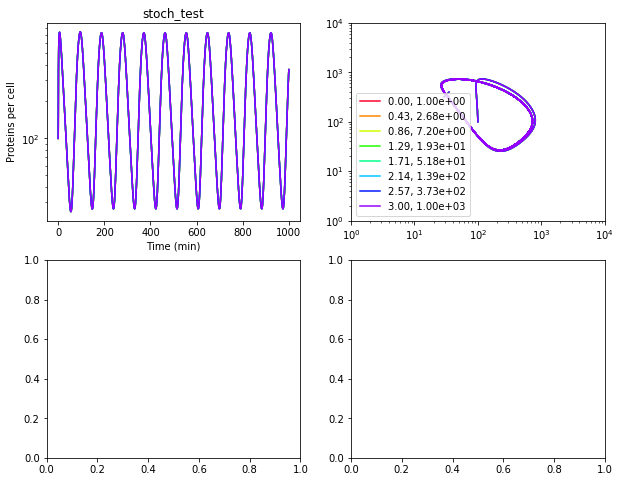

In [6]:
tl='stoch_test'

exec(cmd_init_4figures)

#### timescales
t_max=1000.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
exec(cmd_default_setup)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
cmd_calcrates=precompile(sdot0_det);
#     def dot_det(s,t,param):
#         s[np.isnan(s)]=0;
#         exec(cmd_unpack_all);
#         exec(cmd_calcrates);
#         exec(cmd_wrap_all);
#         return(sdot)


#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
lst=np.linspace(0,3,8)
siz=len(lst)

cmd_onthefly_param='''
#### Temporary parameter/variable change
#         step=1E-3;
step=0;
#         cpnum=10**log_par;
#         cpnum=10;
#         k_p=0.0005;
K=40;

'''

for i,log_par in enumerate(lst):
    num_traj=1;
    s_obss=[None]*num_traj;
    tic=timer.time()
#     step=10**log_par;
    for j in range(num_traj):
        exec(cmd_default_param)
        exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.

        exec(cmd_onthefly_param)
        exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all

#         t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
        s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
        t_obs=t_obs_out[-lc_step:];
        s_obs=s_obs[-lc_step:,:];

        s_obss[j]=(s_obs.tolist());
    s_obss=np.array(s_obss);
    s_obs=s_obss.mean(axis=0)
    s_obs_std=s_obss.std(axis=0,ddof=1);
    s_obs_var=s_obss.var(axis=0,ddof=1);
    s_obs_max=s_obs+s_obs_std
    print(timer.time()-tic)
    exec(cmd_unpack_allobs)
    col=cm(1.*i/(siz));
    lbl='%2.2f, %1.2e'%(log_par,10**(log_par))
    period,amplitude,avg=analyse(p_LacI_obs) ### a custom function that detect the period.
    axL.plot(t_obs/60,p_LacI_obs,'r',label = 'LacI',color=col)


    x=max(int(period*nt),5);
#     ax3.plot(t_obs[x:-x]/60,np.convolve(s_obs_var[:,4],np.array([1./x]*x),'same')[x:-x],'r',label = 'LacI',color=col)
    axR.plot(p_CI_obs,p_LacI_obs,color=col,label=lbl)
    axR.plot(p_CI_obs[-1],p_LacI_obs[-1],'x',color=col)


# axL.set_xlim(1E-1,1000)
# axL.set_ylim(1E-1,6000)
axL.set_yscale('log')
axL.set_xlabel('Time (min)')
axL.set_ylabel('Proteins per cell')
# axL.legend()
axR.set_xscale('log')
axR.set_yscale('log')
axR.set_xlim(1,1E4)
axR.set_ylim(1,1E4)
axR.legend()



In [ ]:
tl='stoch_test'

exec(cmd_init_4figures)

#### timescales
t_max=500.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
step=5;
num_threads=2;
num_traj=5;

exec(cmd_default_setup)

cmd_onthefly_param='''
#### Temporary parameter/variable change
#         step=1E-3;
step=5;
#         cpnum=10**log_par;
#         cpnum=10;
#         k_p=0.0005;
#K=40;

'''

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot0_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
cmd_calcrates=precompile(sdot0_det);
#     def dot_det(s,t,param):
#         s[np.isnan(s)]=0;
#         exec(cmd_unpack_all);
#         exec(cmd_calcrates);
#         exec(cmd_wrap_all);
#         return(sdot)

def worker(*args):
#     traj=odeint(dot_det,s0,t_obs,args=(param,));
#     traj=gill_model_strict(model,s0,t_obs,param=param)
    t_obs,traj=gill_model(cmd_calcrates,s0);
#     print(args)
    return(traj)

#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
lst=np.linspace(0,3,8)
siz=len(lst)



if num_threads >1: p=multiprocessing.Pool(num_threads);
# out=p.map(worker, range(25));
# p.close()
s_obsss=[];
for i,log_par in enumerate(lst):
    s_obss=[None]*num_traj;
    tic=timer.time()
    exec(cmd_default_param)
    exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.
    exec(cmd_onthefly_param)
    exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all
    
    
    if num_threads >1:
        s_obss = p.map(worker, range(num_traj))
    else:
        for j in range(num_traj):
            t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
    #         s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
            t_obs=t_obs_out[-lc_step:];
            s_obs=s_obs[-lc_step:,:];

            s_obss[j]=(s_obs.tolist());
    s_obsss.append(s_obss) 
    print(timer.time()-tic)
    

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
Process PoolWorker-9:
Process PoolWorker-10:
Traceback (most recent call last):


KeyboardInterrupt: 

Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 113, in worker
    result = (True, func(*args, **kwds))
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 65, in mapstar
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 113, in worker
    result = (True, func(*args, **kwds))
  File "/usr/lib/python2.7/multiprocessing/pool.py", line 65, in mapstar
    return map(*args)
    return map(*args)
  File "<ipython-input-5-6c52d1ae9e17>", line 49, in worker
  File "<ipython-input-5-6c52d1ae9e17>", line 49, in worker

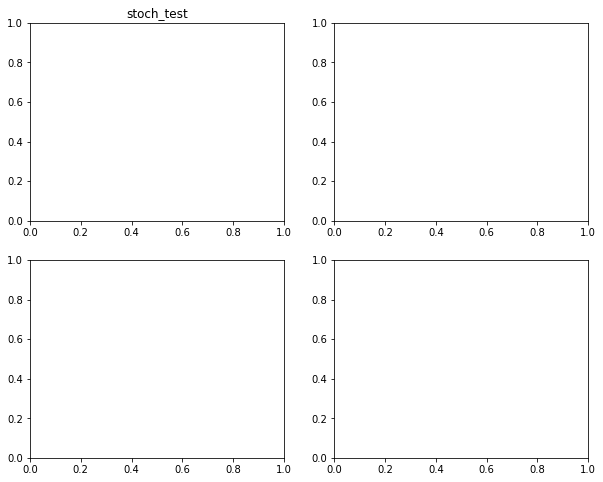

In [5]:
tl='stoch_test'

exec(cmd_init_4figures)

#### timescales
t_max=500.*60.#### set the duration of the simulation
nt=1; #### nt control the sample rate, in unit of fps or Hz. The minimum timescale is set by "step"
t_obs_out=np.linspace(0,t_max,nt*t_max+1) # store obs every 10 seconds
lc_step = len(t_obs_out); ### lc_step control how much of the ending trajectory is selected for analysis.
step=5;
num_threads=2;
num_traj=50;

exec(cmd_default_setup)

cmd_onthefly_param='''
#### Temporary parameter/variable change
#         step=1E-3;
step=5;
#         cpnum=10**log_par;
cpnum=log_par;
#         k_p=0.0005;
#K=40;

'''


#### passing a list to vary parameter on-the-fly
# lst=np.arange(1,4.,.5)
lst=np.linspace(1,100,8)
siz=len(lst)

#### set the stochastic or deterministic iterative operator (to be used in gill_model() or in odeint() )
dot_gill=precompile(sdot0_gill)
# cmd_calcrates=precompile(sdot_det);

## deterministic
cmd_calcrates=precompile(sdot0_det);
#     def dot_det(s,t,param):
#         s[np.isnan(s)]=0;
#         exec(cmd_unpack_all);
#         exec(cmd_calcrates);
#         exec(cmd_wrap_all);
#         return(sdot)

def worker(*args):
#     traj=odeint(dot_det,s0,t_obs,args=(param,));
#     traj=gill_model_strict(model,s0,t_obs,param=param)
    t_obs,traj=gill_model(cmd_calcrates,s0);
#     print(args)
    return(traj)


exec(cmd_default_param)
exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.
exec(cmd_pack_all)
tic=timer.time()
t_obs,s_obs=gill_model(dot_gill,s0);
toc=timer.time()-tic;


if num_threads >1: p=multiprocessing.Pool(num_threads);
# out=p.map(worker, range(25));
# p.close()
s_obsss=[];
for i,log_par in enumerate(lst):
    s_obss=[None]*num_traj;
    tic=timer.time()
    exec(cmd_default_param)
    exec(cmd_default_incond) ### use exec(cmd_pack_all+';s0=s00;'+cmd_unpack_all) to overide an initial state from "s00", but be careful.
    exec(cmd_onthefly_param)
    exec(cmd_pack_all)  #### finish temporary change with cmd_pack_all
    
    
    if num_threads >1:
#         s_obss = p.map(worker, range(num_traj))
        s_obss = p.map_async(worker, range(num_traj)).get(9999999)

    else:
        for j in range(num_traj):
            t_obs,s_obs=gill_model(dot_gill,s0); ### run stochastic model
    #         s_obs=odeint(dot_det,s0,t_obs_out,args=(param,)) #### run deterministic model
            t_obs=t_obs_out[-lc_step:];
            s_obs=s_obs[-lc_step:,:];

            s_obss[j]=(s_obs.tolist());
    s_obsss.append(s_obss) 
    tempf='temp'
    tmp=s_obsss;
    with open(tempf,'w') as f:
        f.write(pickle.dumps(tmp))
    print(timer.time()-tic)

tempf='temp'
tmp=s_obsss;
with open(tempf,'w') as f:
    f.write(pickle.dumps(tmp));

In [4]:
tempf='temp'
tmp=s_obsss;
with open(tempf,'w') as f:
    f.write(pickle.dumps(tmp));

In [3]:
print('done')

done


In [6]:
np.array(s_obsss).shape

(0,)